# Henry Salgado
# Summer 2024

This notebook is used to clean and select sample populations from the complete data set.


In [2]:
import pandas as pd

In [3]:
df = pd.read_csv('/Users/henrysalgado/PycharmProjects/CoacheSEM/researcher-internal-maindata-2020-to-2012_HSI.csv')

/Users/henrysalgado/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (12,43) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
df.shape

(242974, 537)

Data Exploration: Majority of faculty are Tenured Faculty

In [5]:
# Creating a copy of the full data set - this will be used to remove unnecessary data
df_cleaned = df.copy()

counts = df_cleaned['surv_tenure_final'].value_counts()
print("1: Non-Tenure Track | 2: Tenure Track, 3: Tenured ")
print(counts)

1: Non-Tenure Track | 2: Tenure Track, 3: Tenured 
3.0    69729
2.0    25347
1.0    25289
Name: surv_tenure_final, dtype: int64


Data Exploration: HSI sample is rougly 40K 

In [6]:
hsi_count = df_cleaned['hacu_hsi'].value_counts()
print("Number of Non-HSI (0) vs HSI (1) Entries:")
hsi_count

Number of Non-HSI (0) vs HSI (1) Entries:


0    203396
1     39578
Name: hacu_hsi, dtype: int64

Cleaning : Pulling only HSI Faculty in STEM academic areas

In [16]:
df_STEM_HSI = df_cleaned[(df_cleaned['demo_acarea'].isin([13,14, 16, 23])) & (df_cleaned['hacu_hsi'] == 1)]
print("Number of HSI STEM Faculty")
df_STEM_HSI.shape

Number of HSI STEM Faculty


(10317, 537)

Cleaning: Only where survey is Cheater Speed is not "2: Yes" 

In [17]:
df_STEM_HSI = df_STEM_HSI[df_STEM_HSI['surv_speeder_status'] != 2]
df_STEM_HSI.shape


(10302, 537)

Cleaning: Considered "1: Complete" by Harvard 

In [18]:
df_STEM_HSI = df_STEM_HSI[df_STEM_HSI['surv_is_complete'] == 1]
df_STEM_HSI.shape

(4526, 537)

In [19]:
df_STEM_HSI['surv_tenure_final'].value_counts()
sum(df_STEM_HSI['surv_tenure_final'].value_counts())


4526

In [20]:
# Printing faculty type counts with labels
import numpy as np

print("----------------------")

print("1: Non-Tenure Track | 2: Tenure Track, 3: Tenured ")
faculty_type = df_STEM_HSI['surv_tenure_final'].value_counts()
print(faculty_type)

print("----------------------")

# Filter STEM NTT faculty, including those in CCs
ntt_stem = df_STEM_HSI[df_STEM_HSI['surv_tenure_final'] == 1]  
#print("STEM NTT Sample :", ntt_stem.shape)

print("Distribution in NTT")
print(ntt_stem['surv_tenure_final'].value_counts())

# Filter for all faculty types (excluding NTT) at Community Colleges
cc_stem_tenure = df_STEM_HSI[
    (df_STEM_HSI['surv_tenure_final'].isin([2, 3])) &  # Tenure Track or Tenured
    (df_STEM_HSI['demo_inst_carnegie_class'].isin(range(1, 15)))  # Community Colleges (1-14)
]

print("----------------------")
print("Distribution in CC T and TT")
print(cc_stem_tenure['surv_tenure_final'].value_counts())


print("----------------------")


# Combine NTT and Tenure Track/Tenured faculty at Community Colleges (optional)
hsi_stem_instructional = pd.concat([ntt_stem, cc_stem_tenure])

print("NTT HSI STEM Faculty :", hsi_stem_instructional.shape)



----------------------
1: Non-Tenure Track | 2: Tenure Track, 3: Tenured 
3.0    2984
2.0    1037
1.0     505
Name: surv_tenure_final, dtype: int64
----------------------
Distribution in NTT
1.0    505
Name: surv_tenure_final, dtype: int64
----------------------
Distribution in CC T and TT
3.0    293
2.0    173
Name: surv_tenure_final, dtype: int64
----------------------
NTT HSI STEM Faculty : (971, 537)


In [27]:
# Sample of Tenure Track or Tenured Faculty

HSI_stem_tenure = df_STEM_HSI[
    (df_STEM_HSI['surv_tenure_final'].isin([2, 3])) &  # Tenure Track or Tenured
    (~df_STEM_HSI['demo_inst_carnegie_class'].isin([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]))  # Not Community Colleges (1-14)
]

HSI_stem_tenure['surv_tenure_final'].value_counts()


3.0    2691
2.0     864
Name: surv_tenure_final, dtype: int64

Labeling this population as NOT instructional faculty, with a 0

In [35]:
HSI_stem_tenure['instructional'] = 0
HSI_stem_tenure.shape

<ipython-input-35-05a7cdcbebd5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  HSI_stem_tenure['instructional'] = 0


(3555, 538)

Labeling instructional faculty as "instructional" with a 1

In [42]:
hsi_stem_instructional['instructional'] = 1
hsi_stem_instructional.shape

(971, 538)

In [45]:
hsi_stem_complete = pd.concat([HSI_stem_tenure, hsi_stem_instructional], ignore_index=True)
hsi_stem_complete.shape

hsi_stem_complete.to_csv('hsi_stem_complete.csv')

In [ ]:
num_unique_values = hsi_stem_instructional['demo_inst_id'].nunique()
print(num_unique_values)


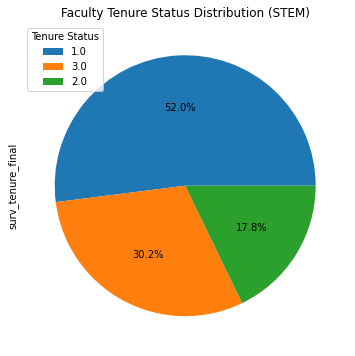

In [37]:
import matplotlib.pyplot as plt

# Get faculty type counts
faculty_type = hsi_stem_instructional['surv_tenure_final'].value_counts()

# Configure the pie chart
plt.figure(figsize=(8, 6))  # Adjust figure size as desired
faculty_type.plot(kind='pie', autopct='%1.1f%%', labels=None)  # Set labels

# Customize the plot (optional)
plt.title("Faculty Tenure Status Distribution (STEM)")
plt.legend(faculty_type.index, loc="upper left", title="Tenure Status")  # Set legend labels

plt.show()

hsi_stem_instructional.to_excel("hsi_stem_instructional.xlsx", index=False)